<a href="https://colab.research.google.com/github/akifkashif/EDA-Capstone-Project---Mohammed-Akifuddin/blob/main/Capstone_of_Final_EDA_Capstone_Project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


# **Data Loading**

In [4]:
# reading the data
df = pd.read_csv('/content/drive/MyDrive/Telecom Churn.csv')

# **Data Understanding**

In [ ]:
# head of data
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
# tail of data
df.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [ ]:
# getting info from the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
# getting description of the data
df.describe()


,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
# getting number of unique values for each column
df.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

# **Data Cleaning**

In [ ]:
#finding the sum of null values in each column
df.isnull().sum()


State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

# There are no null values in the dataset.

In [5]:
# making a copy of our dataframe
df1 = df.copy()

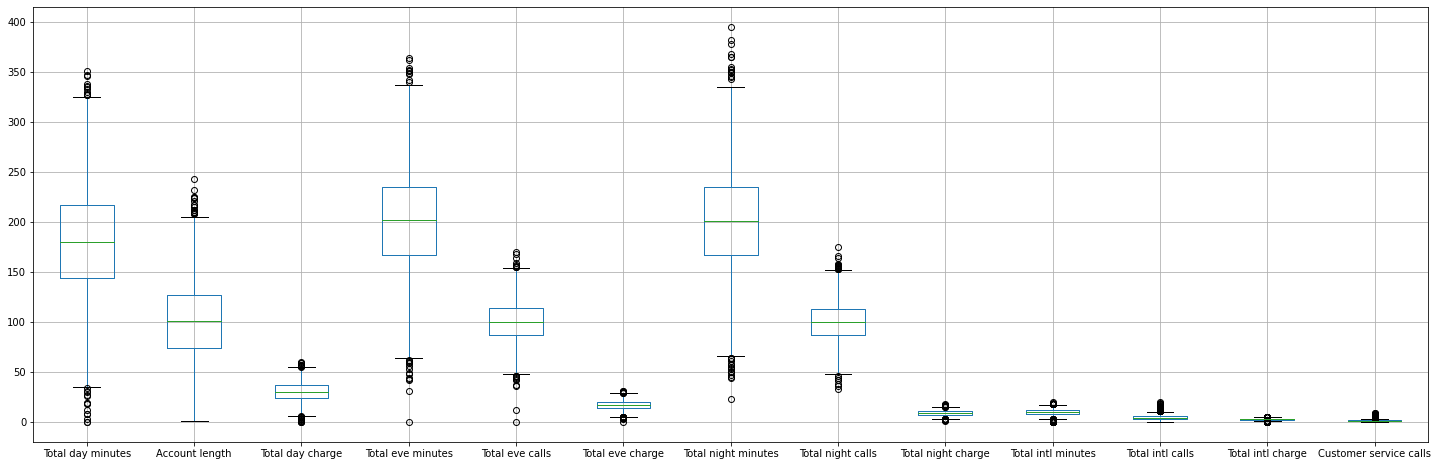

In [7]:
df1.boxplot(column = (['Total day minutes' ,'Account length','Total day charge','Total eve minutes', 'Total eve calls', 'Total eve charge','Total night minutes', 'Total night calls', 'Total night charge','Total intl minutes', 'Total intl calls', 'Total intl charge','Customer service calls']),figsize=(25,8))

#These are the boxplots for visualizing the outliers. The black dots show the outlier presence

In [8]:
# Defining the numeric features of the dataset
# Column Area code only has three values so isn't considered Numeric column and most of the values of column Number vmail messages are zero so removed them
numeric_features= list(df.describe().columns)
numeric_features.remove('Area code')
numeric_features.remove('Number vmail messages')
type(numeric_features)

list

In [9]:
numeric_features

['Account length',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls']

In [10]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [11]:
for col in numeric_features:

  outliers = find_outliers_IQR(df1[col])

  print('number of outliers: '+ str(len(outliers)))

  print('max outlier value: '+ str(outliers.max()))

  print('min outlier value: '+ str(outliers.min()))

  outliers

number of outliers: 18
max outlier value: 243
min outlier value: 208
number of outliers: 25
max outlier value: 350.8
min outlier value: 0.0
number of outliers: 23
max outlier value: 165
min outlier value: 0
number of outliers: 25
max outlier value: 59.64
min outlier value: 0.0
number of outliers: 24
max outlier value: 363.7
min outlier value: 0.0
number of outliers: 20
max outlier value: 170
min outlier value: 0
number of outliers: 24
max outlier value: 30.91
min outlier value: 0.0
number of outliers: 30
max outlier value: 395.0
min outlier value: 23.2
number of outliers: 22
max outlier value: 175
min outlier value: 33
number of outliers: 30
max outlier value: 17.77
min outlier value: 1.04
number of outliers: 46
max outlier value: 20.0
min outlier value: 0.0
number of outliers: 78
max outlier value: 20
min outlier value: 11
number of outliers: 49
max outlier value: 5.4
min outlier value: 0.0
number of outliers: 267
max outlier value: 9
min outlier value: 4


In [12]:
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [13]:
lowerbound,upperbound = outlier_treatment(df1['Account length'])
df1.drop(df1[ (df1['Account length'] > upperbound) | (df1['Account length'] < lowerbound) ].index , inplace=True)
lowerbound,upperbound = outlier_treatment(df1['Total day minutes'])
df1.drop(df1[ (df1['Total day minutes'] > upperbound) | (df1['Total day minutes'] < lowerbound) ].index , inplace=True)
lowerbound,upperbound = outlier_treatment(df1['Total day calls'])
df1.drop(df1[ (df1['Total day calls'] > upperbound) | (df1['Total day calls'] < lowerbound) ].index , inplace=True)
lowerbound,upperbound = outlier_treatment(df1['Total day charge'])
df1.drop(df1[ (df1['Total day charge'] > upperbound) | (df1['Total day charge'] < lowerbound) ].index , inplace=True)
lowerbound,upperbound = outlier_treatment(df1['Total eve minutes'])
df1.drop(df1[ (df1['Total eve minutes'] > upperbound) | (df1['Total eve minutes'] < lowerbound) ].index , inplace=True)
lowerbound,upperbound = outlier_treatment(df1['Total eve calls'])
df1.drop(df1[ (df1['Total eve calls'] > upperbound) | (df1['Total eve calls'] < lowerbound) ].index , inplace=True)
lowerbound,upperbound = outlier_treatment(df1['Total eve charge'])
df1.drop(df1[ (df1['Total eve charge'] > upperbound) | (df1['Total eve charge'] < lowerbound) ].index , inplace=True)
lowerbound,upperbound = outlier_treatment(df1['Total night minutes'])
df1.drop(df1[ (df1['Total night minutes'] > upperbound) | (df1['Total night minutes'] < lowerbound) ].index , inplace=True)
lowerbound,upperbound = outlier_treatment(df1['Total night calls'])
df1.drop(df1[ (df1['Total night calls'] > upperbound) | (df1['Total night calls'] < lowerbound) ].index , inplace=True)
lowerbound,upperbound = outlier_treatment(df1['Total night charge'])
df1.drop(df1[ (df1['Total night charge'] > upperbound) | (df1['Total night charge'] < lowerbound) ].index , inplace=True)
lowerbound,upperbound = outlier_treatment(df1['Total intl minutes'])
df1.drop(df1[ (df1['Total intl minutes'] > upperbound) | (df1['Total intl minutes'] < lowerbound) ].index , inplace=True)
lowerbound,upperbound = outlier_treatment(df1['Total intl calls'])
df1.drop(df1[ (df1['Total intl calls'] > upperbound) | (df1['Total intl calls'] < lowerbound) ].index , inplace=True)
lowerbound,upperbound = outlier_treatment(df1['Total intl charge'])
df1.drop(df1[ (df1['Total intl charge'] > upperbound) | (df1['Total intl charge'] < lowerbound) ].index , inplace=True)
lowerbound,upperbound = outlier_treatment(df1['Customer service calls'])
df1.drop(df1[ (df1['Customer service calls'] > upperbound) | (df1['Customer service calls'] < lowerbound) ].index , inplace=True)

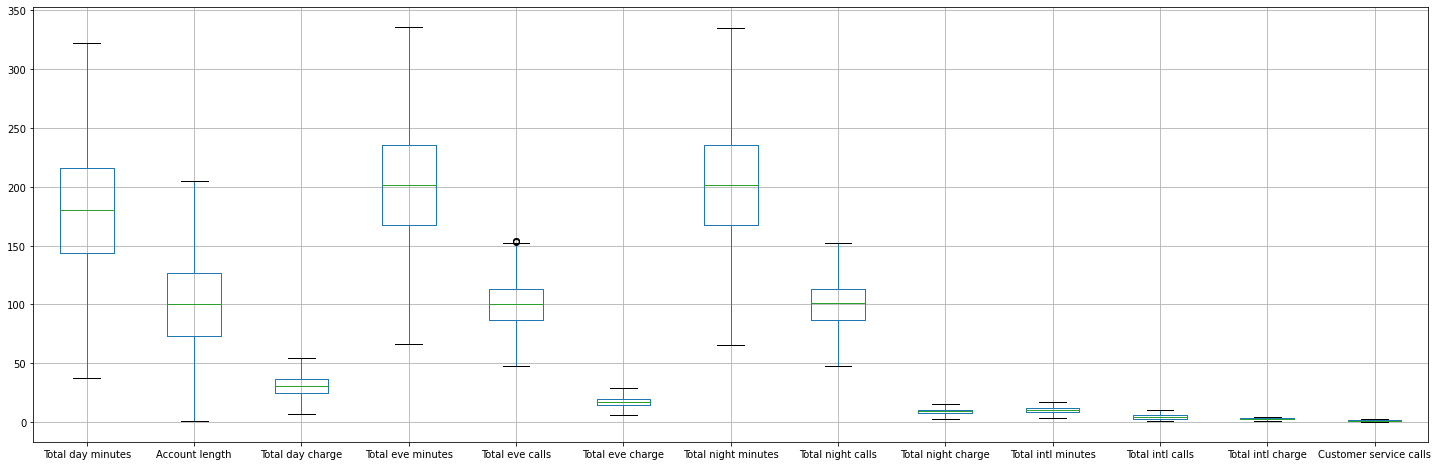

In [14]:
df1.boxplot(column = (['Total day minutes' ,'Account length','Total day charge','Total eve minutes', 'Total eve calls', 'Total eve charge','Total night minutes', 'Total night calls', 'Total night charge','Total intl minutes', 'Total intl calls', 'Total intl charge','Customer service calls'] ), figsize=(25,8))

# These are visualizations of columns as boxplots after outlier treatment

# **Data Visualization**

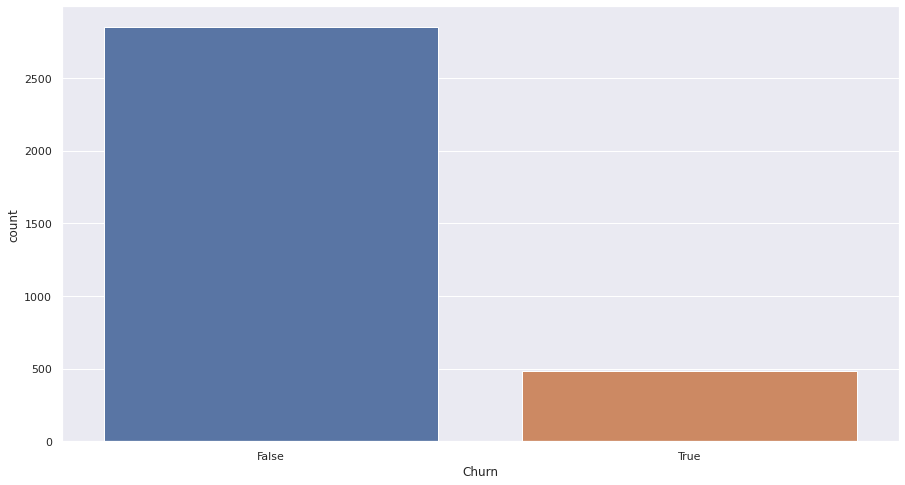

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(x=df["Churn"])

##There are more number of customers who did not Churn

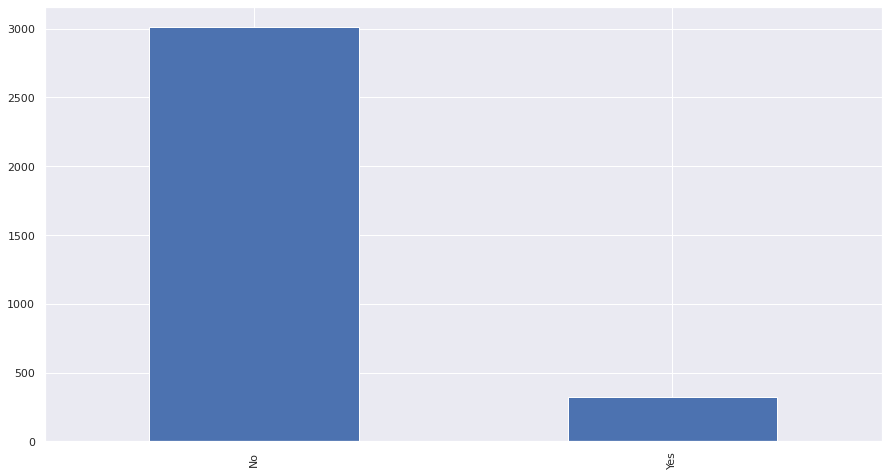

In [ ]:
plt.figure(figsize=(15, 8))
df1['International plan'].value_counts().plot(kind = 'bar')

# It is evident from above plot that Maximum customers do not opt for International plan. 

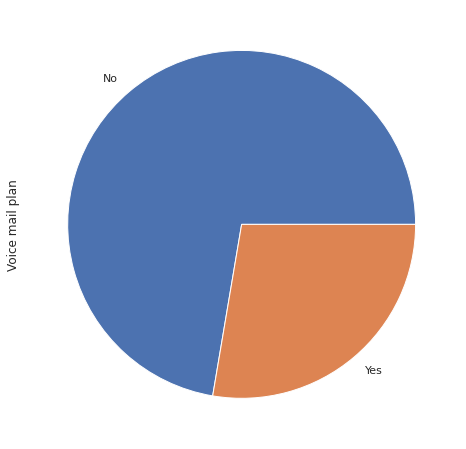

In [ ]:
df['Voice mail plan'].value_counts().plot(kind = 'pie')

# As from the count plot it is visible very minimal amount customers subscribe to voice mail plan.

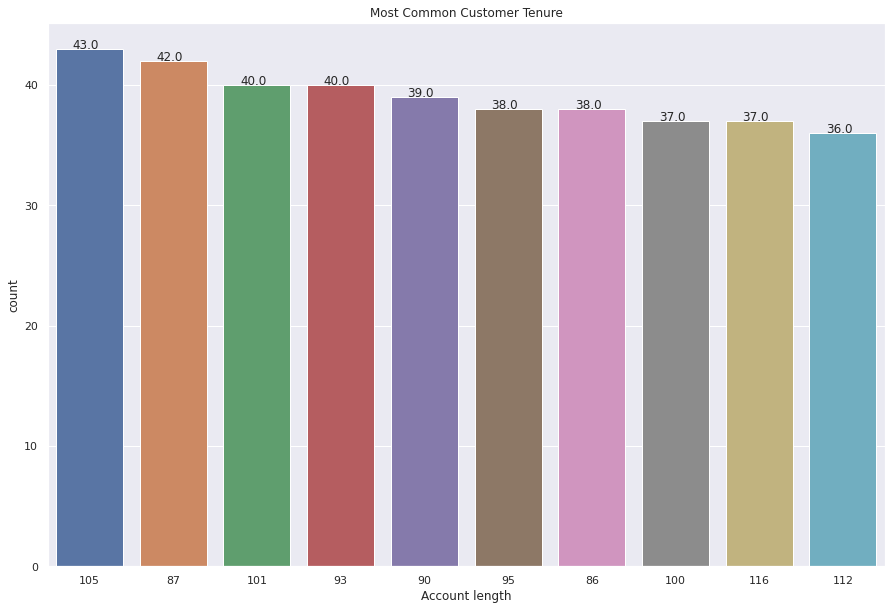

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
ax =sns.countplot(data  = df1,x='Account length',order=df1['Account length'].value_counts().index[0:10])
plt.title('Most Common Customer Tenure')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+ 0.2, p.get_height()+0.01))

# The Customers with Account length of 105 months is maximum followed by 87 months and 101 months

# **Now we will look at the churn rate with respect to state**

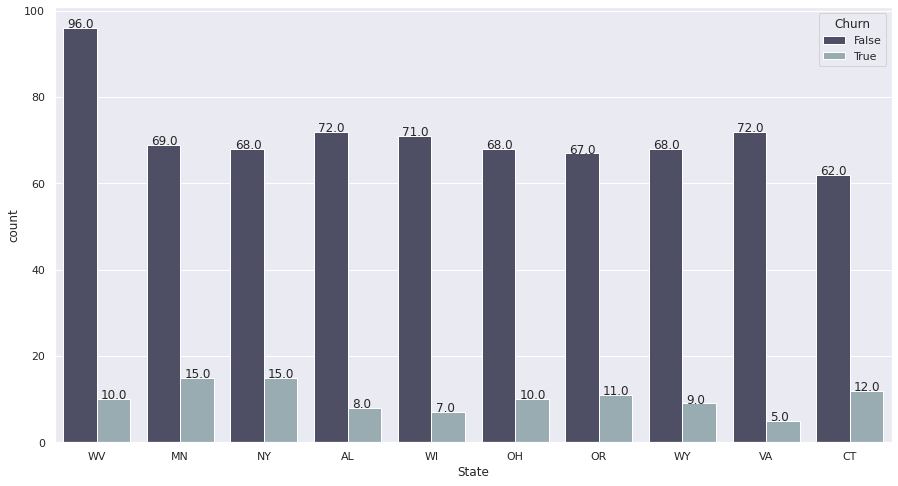

In [ ]:

sns.set(rc={'figure.figsize':(15,8)})
ax = sns.countplot(data = df1, x='State',palette="bone",order=df['State'].value_counts().index[0:10],hue='Churn' )
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+0.01))

# In the countplot it can be observed that in the state of West Virginia most of the Churn/Not churn activity took place followed by Minnesota and New york.

In [ ]:
df1.sort_values(by = 'Total day charge', ascending = False, inplace = True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


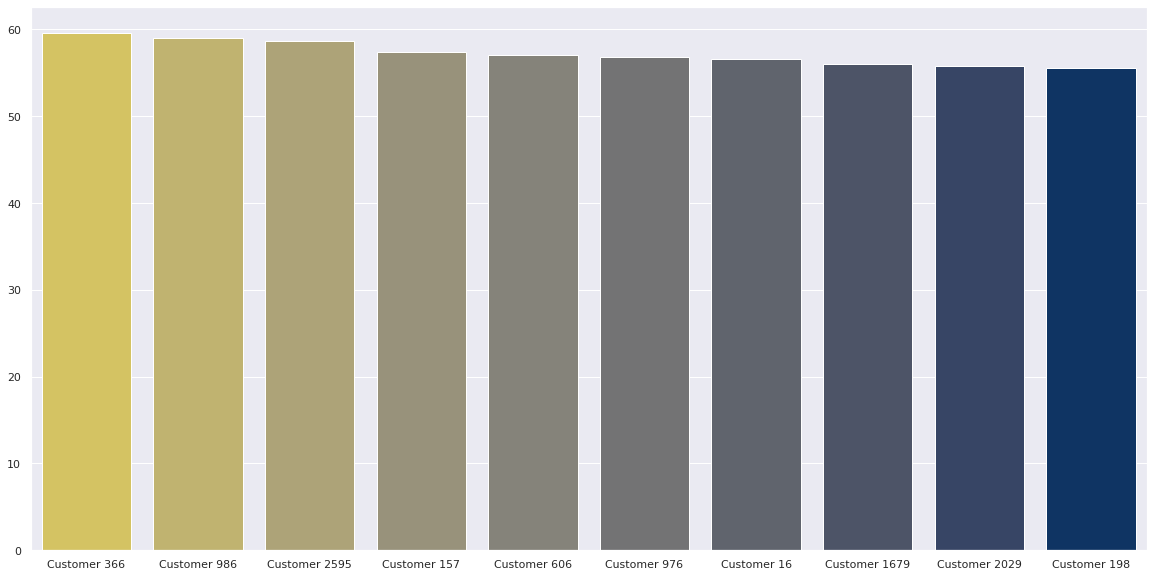

In [ ]:
# Figure Size
fig = plt.figure(figsize =(20, 10))
values = df1['Total day charge'][:10].values
names = ['Customer 366','Customer 986', 'Customer 2595','Customer 157','Customer 606','Customer 976','Customer 16','Customer 1679','Customer 2029','Customer 198']
# Horizontal Bar Plot
sns.barplot(names, values, palette = 'cividis_r')
# Show Plot


# From the bar plot it can be noted that Customer 366 spent most during day time calls with customer 198 being at the bottom of the top 10 list of Total day charge.

In [ ]:
df1.sort_values(by = 'Total eve charge', ascending = False, inplace = True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


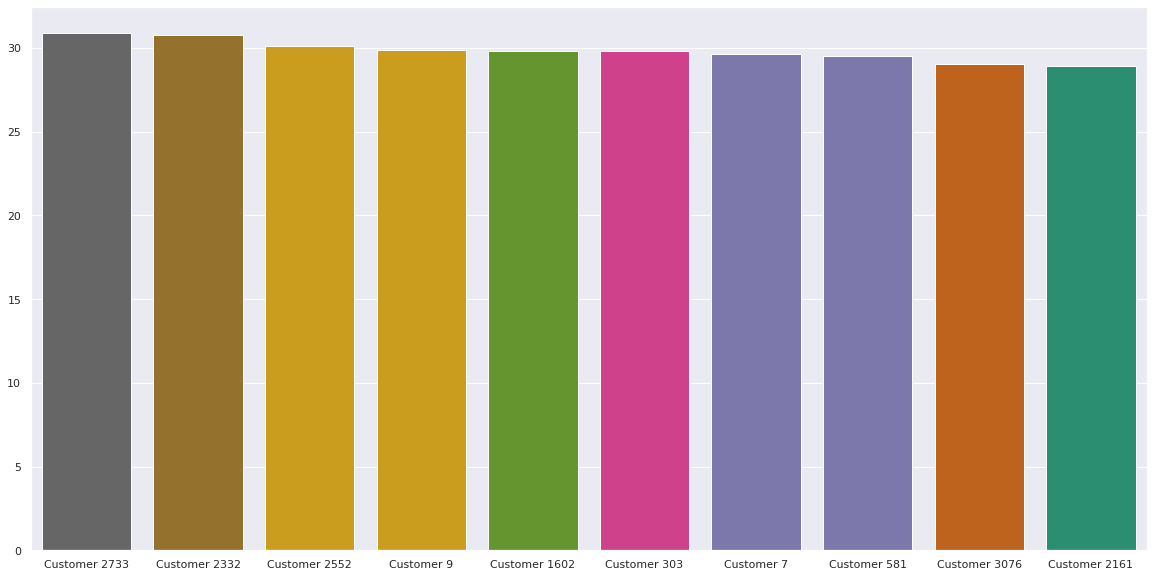

In [ ]:
# Figure Size
fig = plt.figure(figsize =(20, 10))
values = df1['Total eve charge'][:10].values
names = ['Customer 2733','Customer 2332', 'Customer 2552','Customer 9','Customer 1602','Customer 303','Customer 7','Customer 581','Customer 3076','Customer 2161']
# Horizontal Bar Plot
sns.barplot(names, values, palette = 'Dark2_r')
# Show Plot


## The plot suggests that the customer 2733 in on the peak when it comes to evening charges followed by customer 2332 , customer 2552.

In [ ]:
df1.sort_values(by = 'Total night charge', ascending = False, inplace = True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


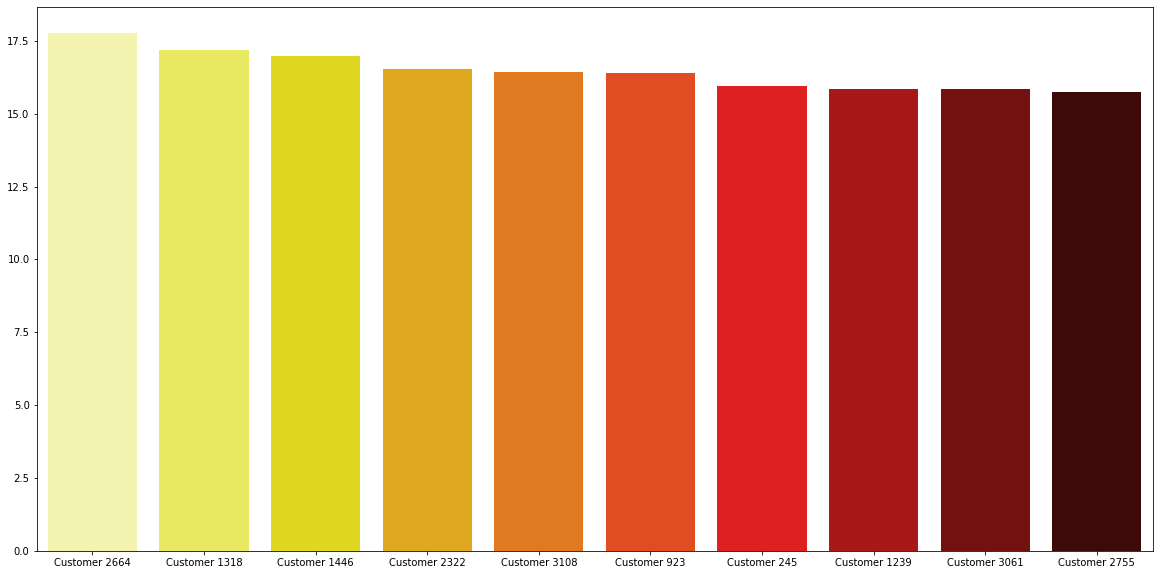

In [ ]:
# Figure Size
fig = plt.figure(figsize =(20, 10))
values = df1['Total night charge'][:10].values
names = ['Customer 2664','Customer 1318', 'Customer 1446','Customer 2322','Customer 3108','Customer 923','Customer 245','Customer 1239','Customer 3061','Customer 2755']
# Horizontal Bar Plot
sns.barplot(names, values, palette = 'hot_r')
# Show Plot


# The maximum spent by a customer during the night time is customer 2664 while customer 2755 spent minimum in the top 10 total night charge list.  

In [ ]:
df1.sort_values(by = 'Total intl charge', ascending = False, inplace = True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


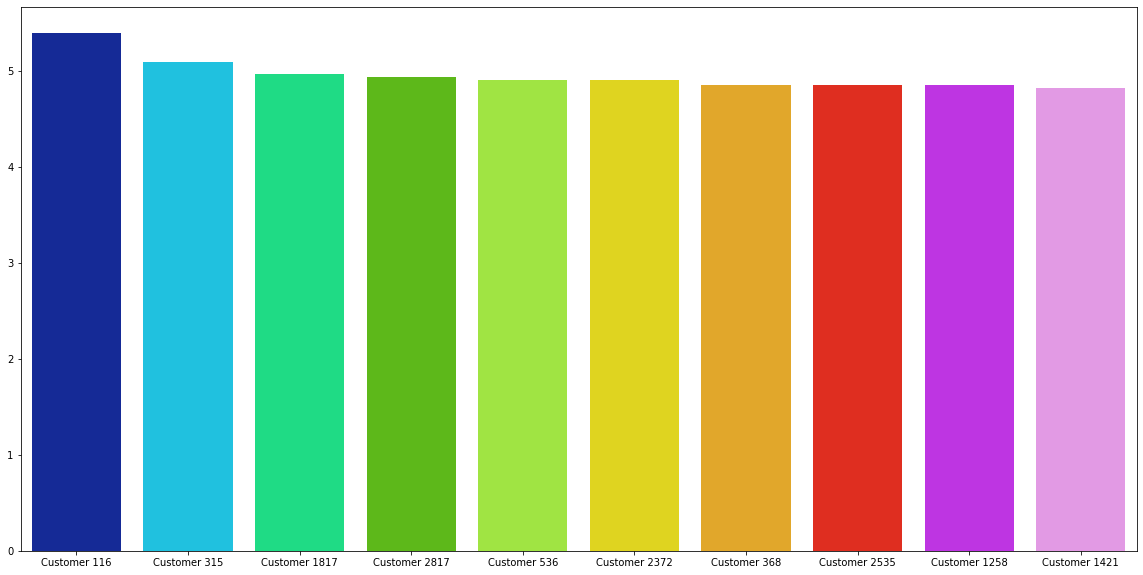

In [ ]:
# Figure Size
fig = plt.figure(figsize =(20, 10))
values = df1['Total intl charge'][:10].values
names = ['Customer 116','Customer 315', 'Customer 1817','Customer 2817','Customer 536','Customer 2372','Customer 368','Customer 2535','Customer 1258','Customer 1421']
# Horizontal Bar Plot
sns.barplot(names, values, palette = 'gist_ncar')
# Show Plot


#  Customer 116 spent the most on International calls

In [ ]:
df1['Total number of calls'] = (df['Total day calls']+ df['Total eve calls'] +  df['Total night calls'] +  df['Total intl calls'])

In [ ]:
df1.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total number of calls
115,ME,36,510,Yes,Yes,42,196.8,89,33.46,254.9,...,21.67,138.3,126,6.22,20.0,6,5.40,0,True,343
314,ID,128,408,No,No,0,125.2,99,21.28,205.4,...,17.46,254.4,111,11.45,18.9,2,5.10,0,False,319
1816,OR,53,415,No,No,0,184.8,98,31.42,216.4,...,18.39,141.1,116,6.35,18.4,3,4.97,2,False,342
2816,ID,130,415,No,No,0,263.7,113,44.83,186.5,...,15.85,195.3,99,8.79,18.3,6,4.94,1,True,321
2371,IL,100,415,No,No,0,191.9,95,32.62,200.9,...,17.08,271.9,74,12.24,18.2,3,4.91,1,False,273


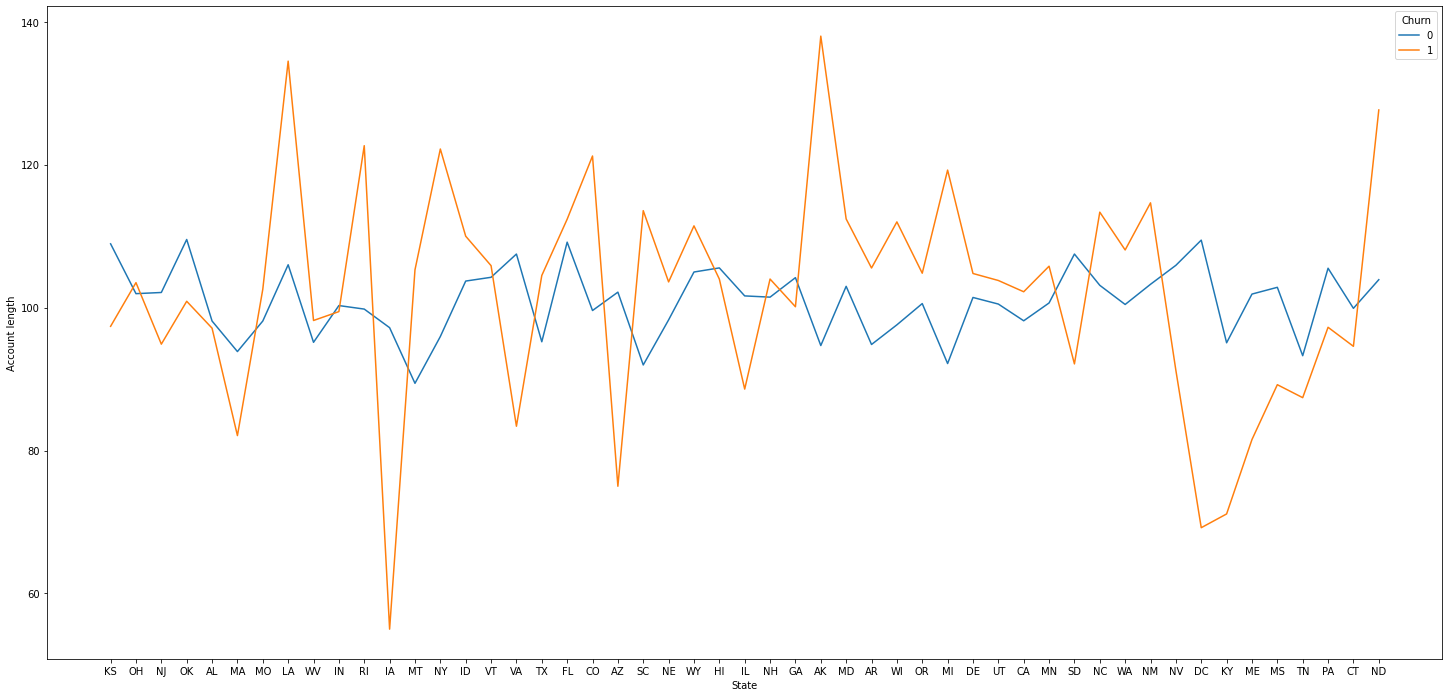

In [ ]:
#plotting Account Length
plt.figure(figsize=(25,12))
sns.lineplot(x='State' ,y ='Account length', data= df1, hue = 'Churn', ci = None)

# Customer with lower tenure(account length) are more likely to churn as you can see the trough of states Iowa, Arizona, Washington DC and Kentucky.

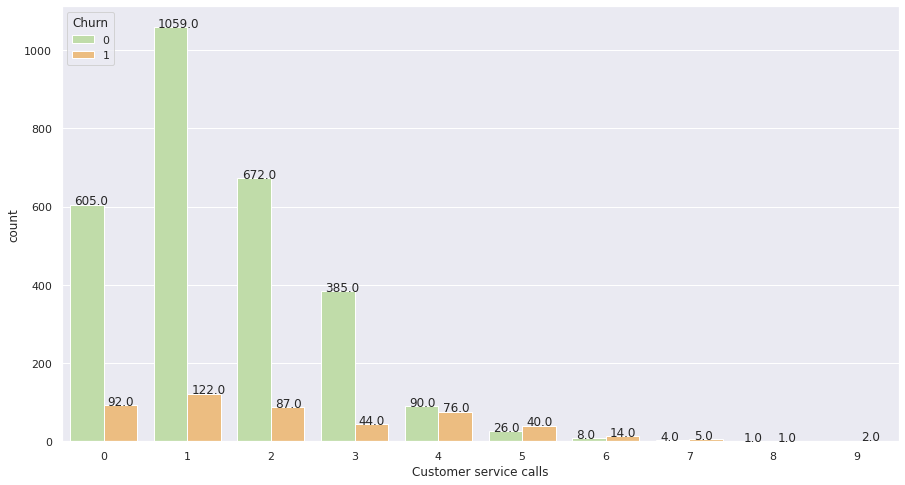

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
ax = sns.countplot(data = df1, x='Customer service calls',palette="Spectral_r",hue='Churn' )
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+0.01))

# We can see great disparity between churn activity when there are less number of customer calls. As the number of calls received increases, the customer is equally likely to churn or not.

# **Hypothesis**: People spend more time on calls during day time
# Null Hypothesis : No, People spend more time on calls during night time
# Alternative Hypothesis : Yes, People spend more time on calls during day time



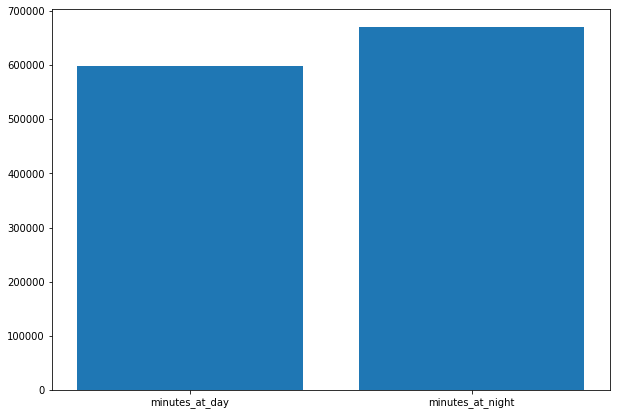

In [ ]:
# Visualizing time spent on calls during day and night
minutes_at_day =  df['Total day minutes'].sum()
minutes_at_night =df['Total night minutes'].sum()
names = ['minutes_at_day','minutes_at_night']
values = [minutes_at_day,minutes_at_night]
fig = plt.figure(figsize =(10, 7))
values = [minutes_at_day,minutes_at_night]
names = ['minutes_at_day','minutes_at_night']
# Horizontal Bar Plot
plt.bar(names, values)
 
# Show Plot
plt.show()

# Above bar plot suggests that the amount of time spent by customers on calls during night time is more than the amount spent during day time. So, We fail to reject the Null Hypothesis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


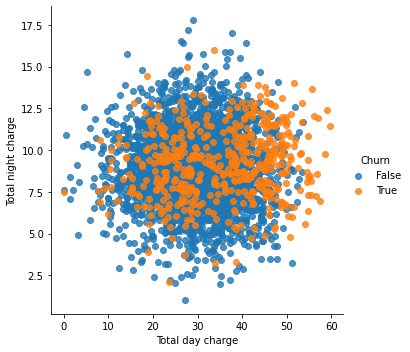

In [ ]:
sns.lmplot('Total day charge', 'Total night charge', data = df, hue='Churn', fit_reg=False);

# Here you can see, the unfaithful users(yellow hue) are scattered at the top right of the plot. This can be interpreted as that the customers who churned are the ones who use the telecom services more.

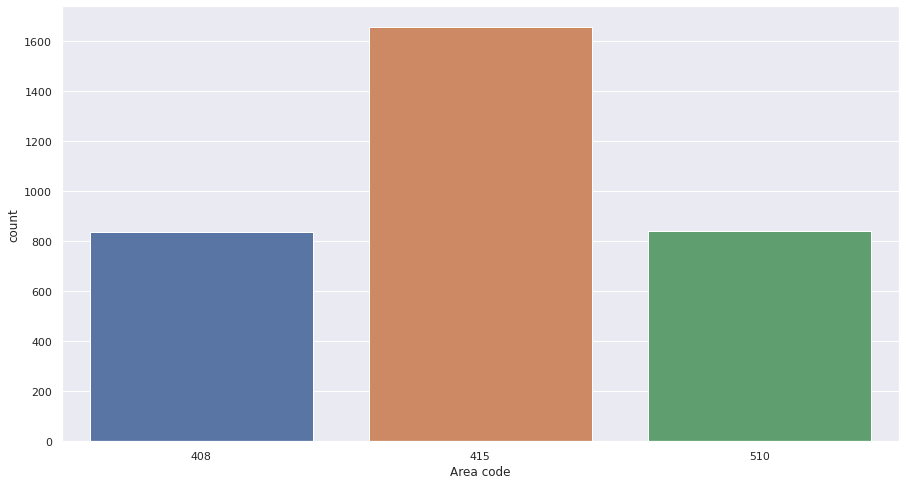

In [ ]:
# knowing the contribution of customerts by different area codes 
sns.countplot(x='Area code', data = df)

# Here it is evident that the states that dwell in the Area code 415 use the telecom services to a greater extent than other codes which are quite similar in number. The reason could be 

In [ ]:
# Distribution of Customers by coastal Region
East_coast = ['AL', 'CT', 'DC', 'DE','FL','GA','IN','KY', 'MA','MD', 'ME','NC', 'NH', 'NJ', 'NY', 'OH', 'RI', 'SC', 'VA', 'VT','WV']
West_coast = ['AK','AZ','CA','CO','HI','ID','MT', 'NM','OK','OR', 'PA','SD', 'UT','WA', 'WY' ]
Central = ['AR','IA','IL','KS','LA','MI', 'MN', 'MO','MS', 'ND', 'NE', 'NV','TN', 'TX', 'WI']

In [ ]:
df['Region of Customers'] = df['State'].apply(lambda x:'East Coast' if x in East_coast else 'West_coast' if x in  West_coast else 'Central')

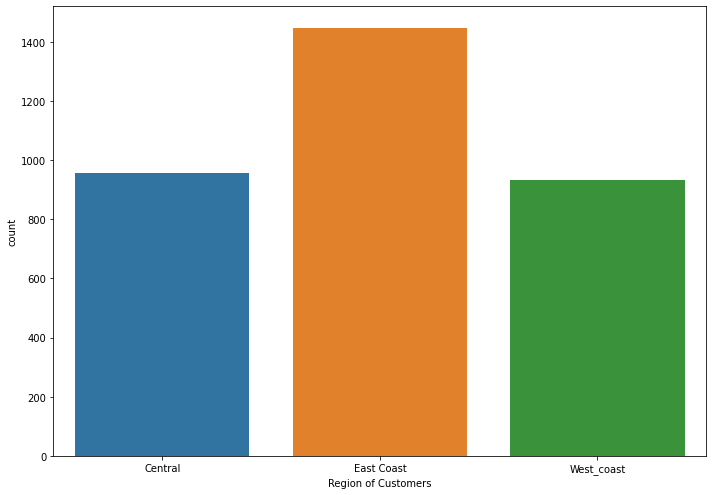

In [ ]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
sns.countplot(x='Region of Customers', data = df  )

# The above plot tells us that amount of subscribers from the East coast region are the highest while West coast is lurking behind Central Region of US.

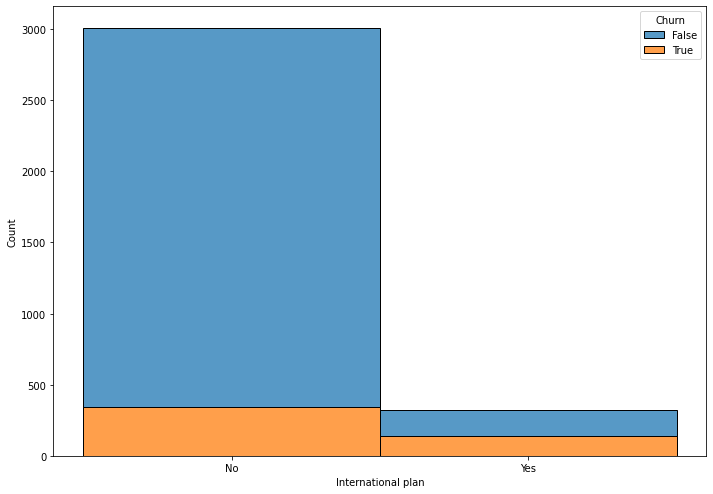

In [ ]:
#International plan with respect to Churn
sns.histplot(binwidth=0.5, x="International plan", hue="Churn", data=df, stat="count", multiple="stack")

#From this histogram, it is evident that people with international plan don't really sway towards churning. On the other hand, people who haven't subscribed to the international plan are more faithful as they have not churned maybe due to underlying reasons like the subscription is expensive and the users are locally based who don't communicate abroad.

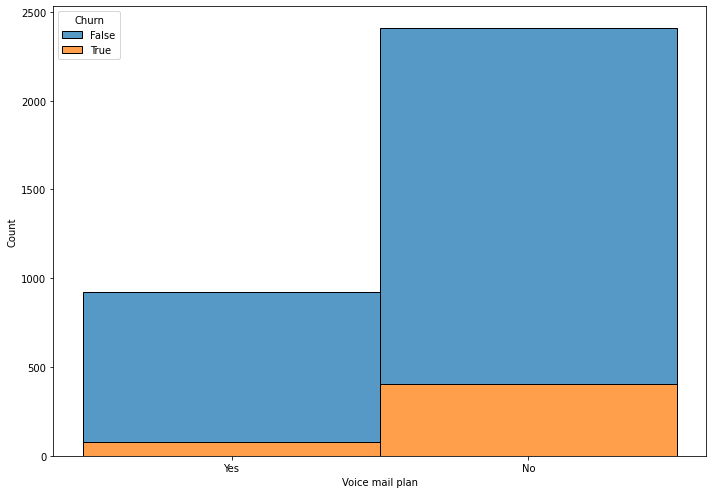

In [ ]:
#International plan with respect to Churn
sns.histplot(binwidth=0.5, x="Voice mail plan", hue="Churn", data=df, stat="count", multiple="stack")

#Most of the customers don't prefer voice mail plan 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


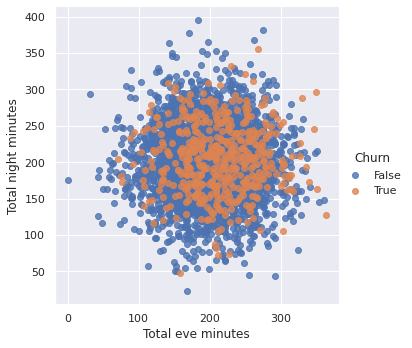

In [ ]:
sns.lmplot('Total eve minutes', 'Total night minutes', data = df, hue='Churn', fit_reg=False);

# From the above plot it is evident that customer who tend to churn, on average spend 200 mintues on calls during evening and night time.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


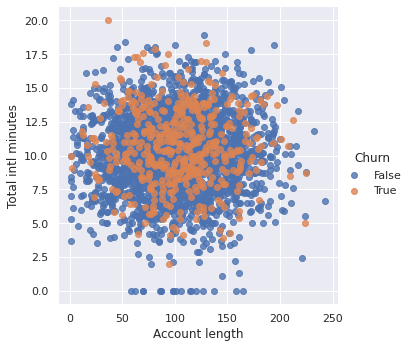

In [ ]:
sns.lmplot('Account length', 'Total intl minutes', data = df, hue='Churn', fit_reg=False);

# Above Implot suggests that on Average subscribers with Account length around 100 months and who dont have international plan tend to churn more

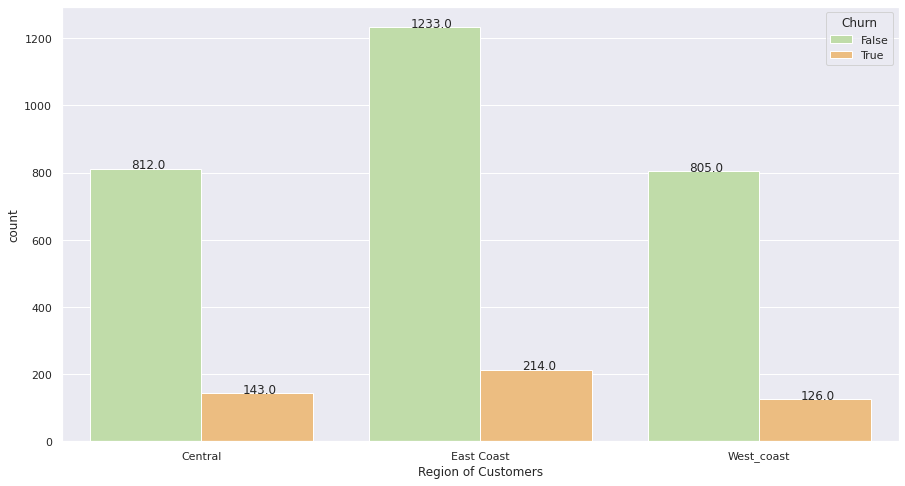

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
ax = sns.countplot(data = df, x='Region of Customers',palette="Spectral_r",hue='Churn' )
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.01))

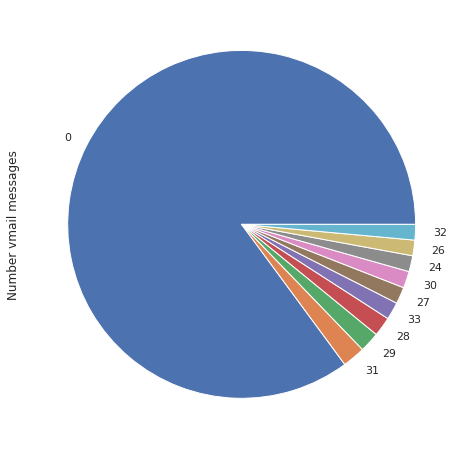

In [ ]:
df['Number vmail messages'].value_counts()[:10].plot(kind = 'pie')

# The above plot suggests that most customers recieves zero amount of voicemail messages 

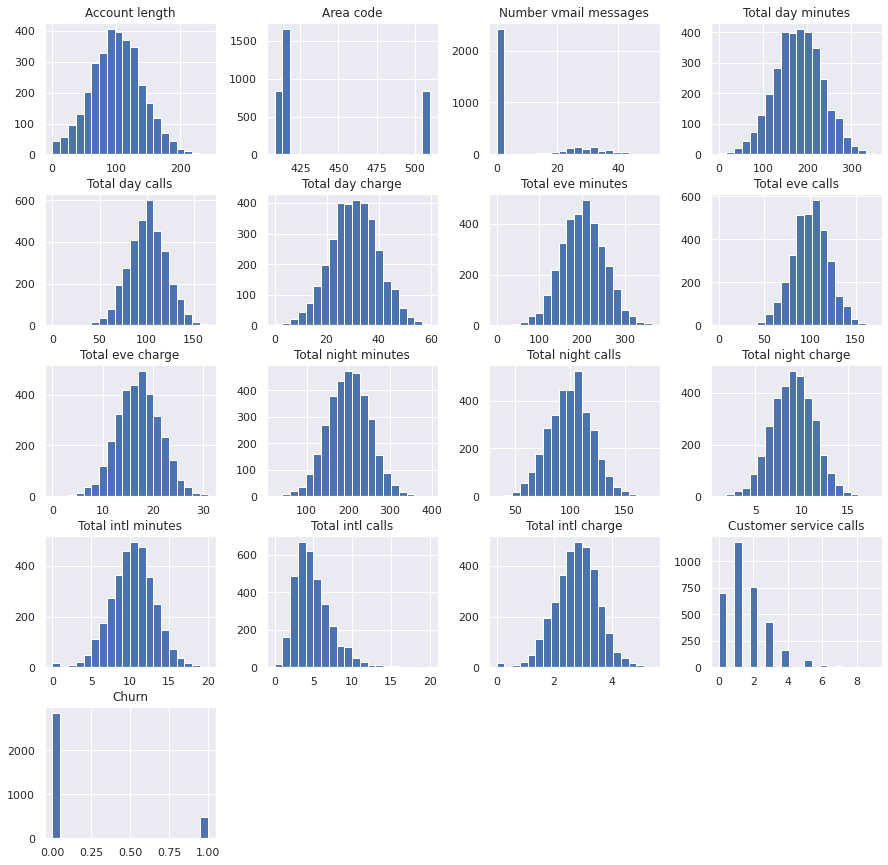

In [ ]:

# Histogram of all the features to understand the distribution
df1.hist(bins = 20 , figsize= (15,15)) ;

#We have plotted the numeric features using histogram and we can see that except customer service calls, Total intl calls ,Number vmail messages, the features are normally distributed with little to no skewness. Thus the variables are as gaussian distribution.

In [ ]:
df2 = df1.copy()

#Correlation Heatmap

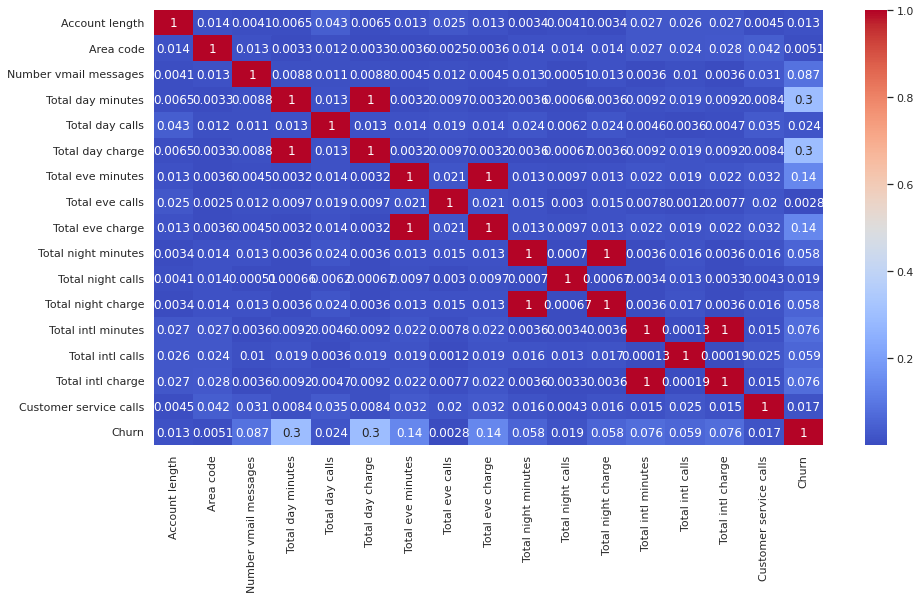

In [ ]:

## Correlation Heatmap 
plt.figure(figsize=(15,8))
correlation = df2.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

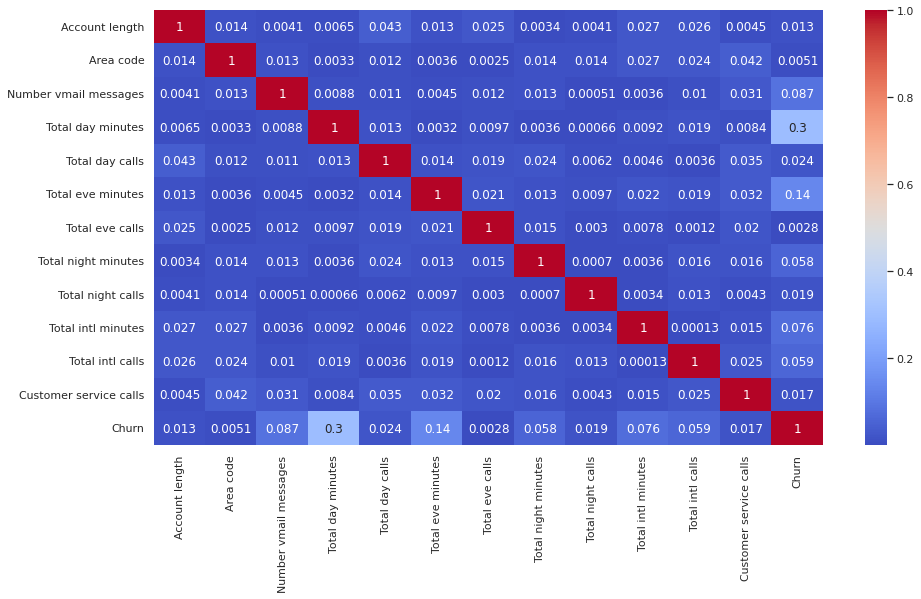

In [ ]:
df2.drop(columns=(['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']),axis=1,inplace= True)
plt.figure(figsize=(15,8))
correlation = df2.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

# **Conclusion of the Project**

***Conclusions from EDA:***

● Most of the customers don’t prefer international plans and voicemail plans. 

● Most of the customers spend more time on calls during day time.

● Business is booming in Area Code 415 specifically in the East Coast Region of the US. 

● Customers on average are using the services for a period of around 8 years. 

● Most of the customers are located in West Virginia. 

● The factors that are affecting the most for customer churn are International Plan, Total day charge, Customer service calls.



 ***To retain customers :***

● The company should give incentives who spend more time on calls during day time 

● The company should concentrate more on pricing than features. 

● The company should lower prices for international plans and its hourly call rates. 

● The company should decrease the frequency of customer service calls received by customers.